# HW1: Data exploration and Dimensionality reduction

In this assignment you will explore the dataset, handle the missing values, standardize the data and and reduce the dimensionality of the feature space. The learning outcome of this part is to know how one can pre-process a real-world dataset and prepare for a supervised or unsupervised learning task.

### Student information
Please provide your information for grading.

In [1]:
STUD_SUID = 'lobe2042'
STUD_NAME = 'Longho Bernard Che'
STUD_EMAIL = 'lobe2042@stud.dsv.su.se'

##  Grading: 

Total points: 4

## OUTLINE: 

Data pre-processing, plotting and dimensionality reduction

1. Reading the file, points: 0.1
2. Missing Values, points: 0.2
3. Impute with scikit-learn, points: 0.2
4. Implement imputation, points: 0.7
5. Plotting, total points: 0.5
    - Boxplots, points: 0.1
    - Pregnancies by class, points: 0.1
    - Age by class, points: 0.2
    - Pairplot, points: 0.1
6. Standardization, points: 0.3
7. Dimensionality reduction, total points: 0.5
    - pca plotting, points: 0.3
    - pca heatmap, points: 0.2
8. Multi-Dimensional Scaling, total points: 1.5
    - Multi-Dimensional Scaling, points: 0.7
    - Multi-Dimensional Scaling with distances , points: 0.8

## `NOTE: Each function you make will be graded, so it is important to strictly follow input and output instructions stated in the skeleton code. Some of the cells have already some variables that are filled with None values or empty dataframes, you should change those nan/empty values to what is asked in the tasks (we only stored the empty values so the whole notebook can run error free). You should not delete any of the given cells as they will help us grade the assignment. Some cells ask you to uncomment some comments, please only do so if you have solved the respective task. When you are finished with implementing all the tasks, clear all outputs,  **restart the kernel**, run all cells again (make sure there is no error) and submit! Make sure that the results and figures asked are visible for us to grade. ` 


In [2]:
import matplotlib.pyplot as plt
#these are the libraries that you will need throughout the assignment. If you need anything else you can either import it here or in the cell were you are working on.
import numpy as np
import pandas as pd
%matplotlib inline

RSEED = 8


## DATA PRE-PROCESSING, PLOTTING AND DIMENSIONALITY REDUCTION

We will use **Pima Indians Diabetes Database** that is publicly available and from UCI. However, we removed and changed some parts of the dataset for the homework evaluation, so **please use the one in the zip file provided in ilearn**.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on specific diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


The dataset consists of several medical predictors (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

According to the information on the data, it has eight attributes and one binary class. The brief explanation of the attributes are as follows:

- Pregnancies: Number of times pregnant.

- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

- BloodPressure: Diastolic blood pressure (mm Hg).

- SkinThickness: Triceps skin fold thickness (mm).

- Insulin: 2-Hour serum insulin (mu U/ml).

- BMI: Body mass index (weight in kg/(height in m)^2).

- DiabetesPedigreeFunction: Diabetes pedigree function.

- Age: Age (years).

- and we have a binary class which can be 0 (healthy) or 1 (diabetes).

## *1.* Reading the file

### `Task: Read the dataset using pandas. Use the file called diabetes.csv that you will find on ilearn on HW1.zip under the folder datasets.`

In [3]:
# Write your code here
# call your dataset: data
data = pd.read_csv("datasets/diabetes.csv")

data = pd.DataFrame(data=data)  #change this

In [4]:
# do not delete this!
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# if you want to see information about the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## *2.* Missing values

### It seems like there is no null data. However, if you check zero values in the dataset, there are so many of them. 

### `Task: Plot a bar plot of the missing values (zero values) per attribute, that exist in the dataset. `



<AxesSubplot:title={'center':'Plot of sum of missing values per attribute'}>

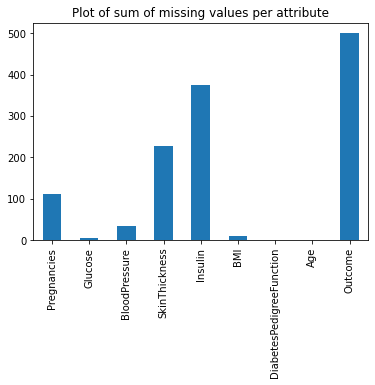

In [6]:
# the steps are just indicative, if you want to do it your own way, please do so as long as you print the required barplot. 
# step 1: store the sum of missing values (the zero values) per attribure in a pandas Series
# step 2: plot the missing values series as a barplot. You can use pandas to plot the series. 

# Write your code here
missing_values_dict = dict()
for attribute in data:
    missing_values = (data[attribute] == 0).sum()
    missing_values_dict[attribute] = missing_values

missing_values_series = pd.Series(missing_values_dict)

# plot the missing values in a bar chart
missing_values_series.plot(kind="bar", title="Plot of sum of missing values per attribute")


## *3.* Impute with scikit-learn

### Is it normal that people's BMI is zero? or not? What about Glucose, and Blood Pressure? You may want to change the zero values into another reasonable value, such as mean or median. The only thing that can have zero value is **pregnancies**. 

### **NOTE**! The outcome is your class, which is not included here in the cleaning process. So it should be left out. 

### `Task: Impute the missing values using the SimpleImputer from scikit-learn with strategy = 'mean'`
### For the scikit-learn imputation, you can find more information [here](https://scikit-learn.org/stable/modules/impute.html).


In [7]:
from pandas import DataFrame
from sklearn.impute import SimpleImputer

# Scickit-learn version
# The steps are just indicative, if you want to do it your own way, please do so as long you store in data_imputed a dataset that includes 
# both the imputed attributes and the ones that you did not impute (Pregnancies, Outcome). The original dataframe called 'data' should remain unchanged. 

# step 1: create a copy of the original dataset called data_imputed
# step 2: create a list with the names of the attributes that you will impute, call it columns
# step 3: create a new dataset called df_part, that includes only the columns that you will impute (the ones from step 2)
# step 4: Change the zero values in the columns to np.nan
# step 5: define the SimpleImputer object (from sklearn) with strategy='mean' and call it imputer, fit and transform the dataset that you created in step 3 
# step 6: convert the resulting array from step 5 into a dataframe, as column names you can pass the names of attributes of the list that you created in step 2. call it df_converted
# step 7: in data_imputed (which is still a copy of data (the original dataset) replace the attributes you wanted to impute with the attribures in df_converted. 

# Important:
# The dataframe called 'data' should remain unchanged. 
# data_imputed should contain all 8 attributes, where every attribute -except 'Pregnancies' and 'Outcome'- have imputed values 

#1
data_imputed = pd.DataFrame(data=data, columns=data.columns)

#2
columns = data.columns[1:-1]

#3
df_part = data_imputed[columns]

#4
df_part = df_part.replace(0, np.nan)

#5
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', copy=False)
imputer.fit(df_part)
imputed_data = imputer.transform(df_part)

#6
df_converted = DataFrame(data=imputed_data, columns=columns)

mergeable = pd.DataFrame(data=data, columns=["Pregnancies", "Outcome"])

data_imputed = pd.concat(([df_converted, mergeable]))

In [8]:

# if you successfuly finished the imputation for task3, uncomment the following:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# if you successfuly finished the imputation for task3, uncomment the following:
data_imputed.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,3.845052,0.348958
std,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,3.369578,0.476951
min,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,1.000000,0.000000
50%,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,3.000000,0.000000
75%,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,6.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,17.000000,1.000000


## *4.* Implement imputation

### `Task: Make a function changing zero values into the mean of the column. In order to get the points it is necessary to write the code yourself and not use skickit-learn.`
### You will impute the missing values with the mean of the column without using scikit-learn. You will store the resulting dataset in diabetes_1. diabetes_1 will not be used again after this task. 

In [10]:
def imputation(df:DataFrame, columns:list):
    """
     A function to change nan value (or zero value) to the mean of the attribute
        
        # the steps are just indicative
        - Step 1: Get a part of dataframe using columns received as a parameter.
        - Step 2: Change the zero values in the columns to np.nan
        - Step 3: Change the nan values to the mean of each attribute (column). 
                  You could use the apply(), fillna() functions.
        
        Input:
          df: A dataframe to apply imputation
          columns: A list of columns that need to be imputed
          
        Output:
          An imputed dataframe
    
    """
    filtered = df[columns]
    filtered = filtered.replace(0, np.nan)
    filtered = filtered.apply(lambda col: col.fillna(col.mean()))
    return filtered

In [11]:

diabetes_1 = imputation(data,["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction","Age"])
diabetes_1.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [12]:
# if you successfuly finished the imputation, uncomment this
from pandas.util.testing import assert_frame_equal

try:
    assert_frame_equal(data_imputed, diabetes_1, check_dtype=False, check_less_precise=True)
    print("result: equal")
except:
    print("result: not equal")



result: not equal


/Users/blongho/opt/anaconda3/envs/data-mining/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  
/Users/blongho/opt/anaconda3/envs/data-mining/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The 'check_less_precise' keyword in testing.assert_*_equal is deprecated and will be removed in a future version. You can stop passing 'check_less_precise' to silence this warning.
  """


## *5.* Plotting

### a.	Boxplots

### `Task: Create 4 boxplots in 1 figure for the following attributes: Glucose, BloodPressure, Insulin, BMI`

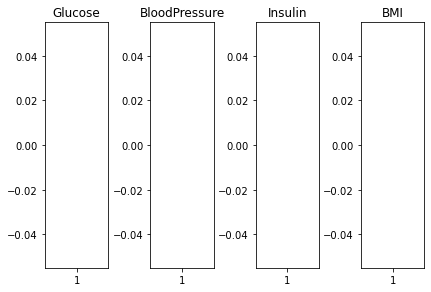

In [13]:
# You can find a similar example in Lab1_Preprocessing_EDA. 
# Create 1 figure with 4 subplots. Each axes should contain the boxplot of the specified attributes and corresponding titles. Use data_imputed

fig, ax = plt.subplots(1, 4)  #create 1 row with 4 plots

plt.tight_layout()
ax[0].set_title('Glucose')
ax[0].boxplot(data_imputed['Glucose'])

ax[1].set_title('BloodPressure')
ax[1].boxplot(data_imputed['BloodPressure'])

ax[2].set_title('Insulin')
ax[2].boxplot(data_imputed['Insulin'])

ax[3].set_title('BMI')
ax[3].boxplot(data_imputed['BMI'])

fig.set_label("Plot of the numerical values")
plt.show()


## b.	Pregnancies by class 

### `Task:  Plot the Pregnancies attribute in relation to the class (Outcome). Make a grouped barplot`


In [14]:
# The steps are just indicative, if you want to do it your own way, please do so as long as you plot the asked figure
# step 1: Store in pregnancies_by_class, a dataframe with the counts of unique values of the attribute pregnancies by class (Outcome). You can use groupby() and value_counts()
# step 2: Plot a barplot for the pregnancies_by_class. You can use pandas to plot it.

#Write your code here





## c.	Age by class 

### `Task:  Plot the Age attribute in groups of 10 years in relation to the class (Outcome)`

Information about the cut function [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)

In [15]:
# step 1: Divide the age column into the following age groups: 0-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-100 using the cut function from pandas. The new column should be called age_bins.
# step 2: Store in age_by_class, a dataframe with the counts of unique values of the attribute age_bins by class. You can use groupby() and value_counts()
# step 2: Plot a barplot for the age_by_class. You can use pandas to plot it.
# step 3: **Drop the age_bins** attribute from data_imputed after you have plotted the barchart. Do not skip dropping the age_bins

#Write your code here




In [16]:
# do not delete this
data_imputed.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,NaN,NaN
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,NaN,NaN
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,NaN,NaN
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,NaN,NaN
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,NaN,NaN


## d.	Pairplot

### `Task: Make a pairplot of all the numerical values of the dataset. You can use seaborn.`

In [17]:

# step1: make a pairplot, using seaborn, of all the numerical values of data_imputed. Pass hue = 'Outcome'
# Write your code here



## *6.* Standardization

### Standardization transforms data to have a mean of zero and a standard deviation of 1. 

### It is a crucial step before performing PCA, since we are interested in the components that maximize the variance. 





### `Task: Standardize the data_imputed dataset. You can use sklearn.  `
### NOTE! Outcome is the class of the dataset indicating if a patient is healthy or has diabetes. As we discussed in the lab, the class should not be included in the standardization. 

In [18]:
# the steps are just indicative
# step 1: Use StandardScaler to fit_transform data_imputed, excluding the class (Outcome)
# step 3: Transform the standardized numpy matrix returned by StandardScaler into a dataframe called data_standardized.
# step 4: Rename the columns of the dataframe with their corresponding names.
# step 5: Store in a variable called y the attribute Outcome (your class)

# Write your code here


y = pd.Series()  #change this
data_standardized = pd.DataFrame()  #change this


/Users/blongho/opt/anaconda3/envs/data-mining/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


In [19]:
# do not delete this
data_standardized.head(5)

""


In [20]:
# do not delete this
y.head(5)

Series([], dtype: float64)

## *7.* Dimensionality Reduction

## a. PCA plotting

### `Task: Reduce the dimensionality of the standardized dataset in 2 Principal Components, with Principal Component Analysis. Print the explained variance ratio and a dataframe with all the principal components. `

In [21]:
# step1: Reduce the dimensionality of the standardized dataset in 2 Principal Components, with Principal Component analysis. You can use PCA from sklearn. Use random state = RSEED
# step2: Store the explained variance ratio in an array called explained_variance_ratio.
# step3: Store in a dataframe called df_principal_components, the result of pca's attribute components_, with the respective attribute names.
# step4: Plot the two principal components with colors respective to the class (Outcome).

# Write your code here

explained_variance_ratio = None  #change this
df_principal_components = pd.DataFrame()  #change this



In [22]:
df_principal_components

""


In [23]:
explained_variance_ratio

## b. 	Heatmap

### `Task: Use seaborn to plot the heatmap of df_principal_components. Store in a variable called attribure_contributing_the_most, which attribure contributes most to the variance of the 1st PC.`

In [24]:

#Write your code here



In [25]:
# Which attribute contributes the most in the variance of the 1st principal component? 
# store the name of the attribute here:

attribute_contributing_the_most = " ? "

In [26]:
# do not delete this
attribute_contributing_the_most

' ? '

## *8.* Multi-Dimensional Scaling

Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.
In general, MDS is a technique used for analyzing similarity or dissimilarity data and it can help visualize the distances or dissimilarities between sets of objects. Examples of similarity or dissimilarity data might include the distance between pairs of cities (or planets at a particular point in time) or the similarity among groups of people (voters, patients etc). 

In these last two excercises we will apply Multi-Dimensional Scaling in our patient dataset using two different versions of the MDS sklearn algorithm. 

We will focus on the attribute **dissimilarity** of the MDS object. The attribute can be either 'euclidean' or 'precomputed'. In the former case the euclidean distance between the data points is computed by the algorithm, while in the latter case the user must themeselves compute the dissimilarities between data points and pass this to fit_transform. Your first task will be to apply MDS with dissimilarity='euclidean', while for the second MDS task to compute the distances between the points yourself (using any library you want) and pass dissimilarity='precomputed'. 

Please advice the sklearn page for MDS to be able to implement the above tasks: [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html). Make sure you understand the parameters of fit_transform and how you could use them for the tasks!


## a. Multi-Dimensional Scaling, dissimilarity='euclidean'

###   `Task: Apply MDS on the data_standardized with n_components=2 and dissimilarity='euclidean'. Plot the 2 resulting coordinates with colors respective to the class label.`

Note: This is very similar to how we applied sklearn's PCA on task 7!

In [27]:
# step 1: Initialize MDS with n_components = 2 and random_state=RSEED
# step 2: Fit and transform the standardized dataset
# step 3: Plot the resulting coordinates with colors respective to the class (Outcome).

# write your code here



##  b. Multi-Dimensional Scaling with distances

### `Task: Compute the pairwise distances between observations using the euclidean metric. Apply MDS on the custom matrix with the pairwise distances with n_components=2 and dissimilarity='precomputed'. Plot the results with colors respective to the class label. 

Note the resulting plot should look similar with the one of Task 8. 

In [28]:
# step 1: compute the pairwise distances between observations using the euclidean metric. 

# One of the ways to do this is to use pdist and squareform from the scipy library (see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html)) 
# or euclidean_distances from sklearn. In any case the returned array should be: distances ndarray of shape (n_samples_data_standardized, n_samples_data_standardized)

# step 2: create an MDS object with n_components=2, random_state=RSEED, dissimilarity="precomputed"
# step 3: apply MDS on the constructed square distance matrix from step 1
# step 4: plot the results with colors respective to the class label


# write your code here

## `NOTE: Each function you make will be graded, so it is important to strictly follow input and output instructions stated in the skeleton code. Some of the cells have already some variables that are filled with None values or empty dataframes, you should change those nan/empty values to what is asked in the tasks (we only stored the empty values so the whole notebook can run error free). You should not delete any of the given cells as they will help us grade the assignment. Some cells ask you to uncomment some comments, please do so if you have solved the respective task. When you are finished with implementing all the tasks, clear all outputs, **restart the kernel**, run all cells again (make sure there is no error) and submit! Make sure that the results and figures asked are visible for us to grade. ` 


# End of assignment 1